In [402]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

spice = pd.read_csv(r'E:\AnalystBuilderTestFolder\WorldSpice\Export.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: f'{x:.3f}')
#I checked Nulls and Datatypes with info(), but commenting it out to reduce bloat. No action needed.
#spice.info()

In [404]:
spice.head(1)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Item Code (CPC),Item,Year,Unit,Import,Export,Production,Consumption
0,TCL,Crops and livestock products,4,Afghanistan,5610,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2014,t,283.850,21099.000,21500.000,684.850


### Reviewing the data present, I find four columns that are superfluous and safe to drop. The dataset was curated on spices, and therefore, all come from the same domain & domain code (Crops and Livestock products, TCL). All spices are weighed by tonnes, and the element is also static at 5610.

### This was determined by using unique() with each column, e.g.: 
spice['Element Code'].unique()

In [407]:
#Making some columns easier to work with
spice.rename(columns={'Area Code (M49)': 'Area Code', 'Item Code (CPC)': 'Item Code'}, inplace = True)
#Area code is also unhelpful
spice.drop(['Domain Code', 'Domain', 'Element Code', 'Unit', 'Area Code'], axis=1, inplace = True)

In [408]:
#original item names
spice['Item'].unique()

array(['Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw',
       'Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw',
       'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)',
       'Cinnamon and cinnamon-tree flowers, raw',
       'Cloves (whole stems), raw', 'Ginger, raw',
       'Nutmeg, mace, cardamoms, raw', 'Pepper (Piper spp.), raw',
       'Vanilla, raw'], dtype=object)

In [409]:
spice.loc[spice['Item'].str.contains('Anise'), 'Item'] = "Umbellifers, Juniper & Badian"
spice.loc[spice['Item'].str.contains('dry'), 'Item'] = "Dry Chillies"
spice.loc[spice['Item'].str.contains('green'), 'Item'] = "Green Chillies"
spice.loc[spice['Item'].str.contains('Cinnamon'), 'Item'] = "Cinnamon"
spice.loc[spice['Item'].str.contains('Cloves'), 'Item'] = "Clove"
spice.loc[spice['Item'].str.contains('Ginger'), 'Item'] = "Ginger"
spice.loc[spice['Item'].str.contains('Nutmeg'), 'Item'] = "Nutmeg & Cardamom"
spice.loc[spice['Item'].str.contains('Piper'), 'Item'] = "Pepper"
spice.loc[spice['Item'].str.contains('Vanilla'), 'Item'] = "Vanilla"

In [410]:
#counting China & Taiwan separately
spice = spice[spice['Area'] != "China"]

In [411]:
largeConsumer = spice.groupby(['Area']).filter(lambda x: x['Consumption'].mean() > 1000)

In [412]:
comparedToAvg = (largeConsumer.groupby(['Area', 'Item'])['Consumption'].mean() - largeConsumer.groupby(['Item'])['Consumption'].mean()).reset_index()

In [413]:
aboveAvgConsumption = comparedToAvg[comparedToAvg['Consumption'] > 0]

In [414]:
aboveAvgConsumption.groupby(['Item'])['Area'].count()

Item
Cinnamon                         20
Clove                             7
Dry Chillies                     21
Ginger                           15
Green Chillies                   13
Nutmeg & Cardamom                20
Pepper                           27
Umbellifers, Juniper & Badian    17
Vanilla                          15
Name: Area, dtype: int64

In [415]:
aboveAvgConsumption.groupby(['Area','Item']).mean()

Consumption
Area                                               Item                                      
Algeria                                            Green Chillies                  103473.217
Azerbaijan                                         Vanilla                             33.588
Bangladesh                                         Cinnamon                          4316.806
                                                   Dry Chillies                    153120.183
                                                   Ginger                           82293.987
                                                   Nutmeg & Cardamom                 1697.092
                                                   Umbellifers, Juniper & Badian     3770.740
Benin                                              Dry Chillies                     19186.021
Bhutan                                             Nutmeg & Cardamom                  596.437
Bosnia and Herzegovina                             Dry Chillies                       593.025
Brazil                                             Cinnamon                           375.316
                                                   Pepper                           17855.171
Burkina Faso                                       Pepper                           14710.808
Cameroon                                           Ginger                            4721.319
Canada                                             Cinnamon                            72.810
                                                   Pepper                            1221.238
                                                   Vanilla                             43.635
China, Taiwan Province of                          Cinnamon                           147.006
                                                   Ginger                            5741.517
China, mainland                                    Cinnamon                         16326.296
                                                   Clove                              331.376
                                                   Dry Chillies                    141821.018
                                                   Ginger                           55624.801
                                                   Green Chillies                12194010.971
                                                   Nutmeg & Cardamom                 2424.532
                                                   Pepper                           22085.384
                                                   Umbellifers, Juniper & Badian    31339.104
                                                   Vanilla                            607.572
Côte d'Ivoire                                      Dry Chillies                     46082.616
Democratic Republic of the Congo                   Dry Chillies                      4148.364
Egypt                                              Dry Chillies                     22820.216
                                                   Green Chillies                  436681.254
                                                   Nutmeg & Cardamom                  211.061
                                                   Pepper                            2027.369
                                                   Umbellifers, Juniper & Badian    12915.677
Ethiopia                                           Dry Chillies                    134620.661
France                                             Pepper                            2486.838
                                                   Vanilla                            323.282
Germany                                            Cinnamon                           876.935
                                                   Green Chillies                   46261.304
                                                   Nutmeg & Cardamom                 1262.233
                                        

In [416]:
subsetList = ['Canada', 'China, mainland', 'China, Taiwan Province of', 'United States of America']
subset = spice[spice['Area'].isin(subsetList)]

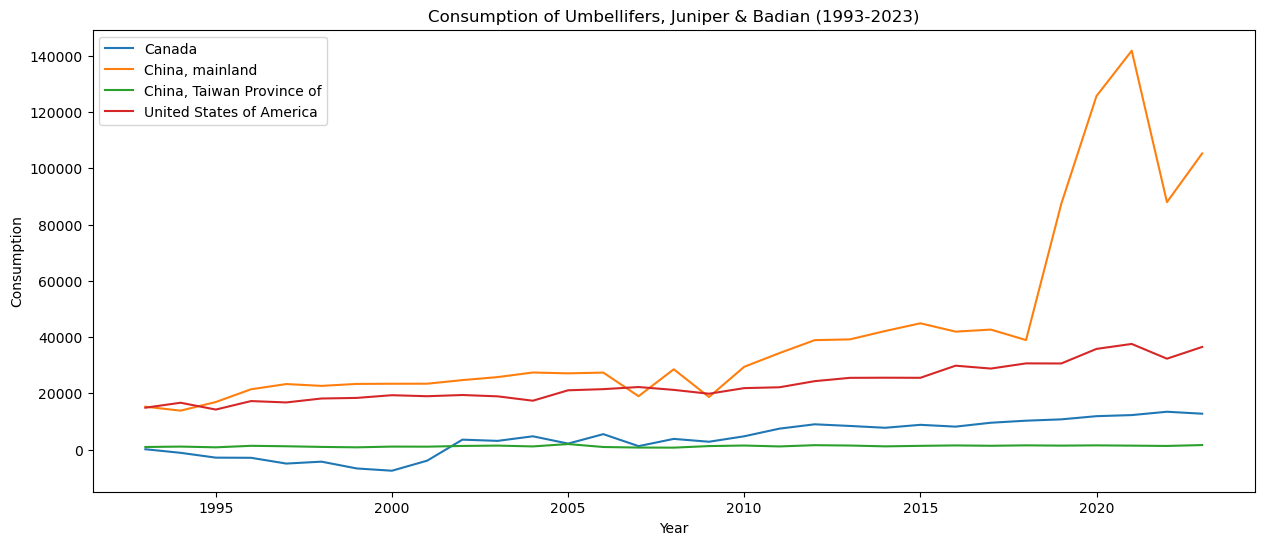

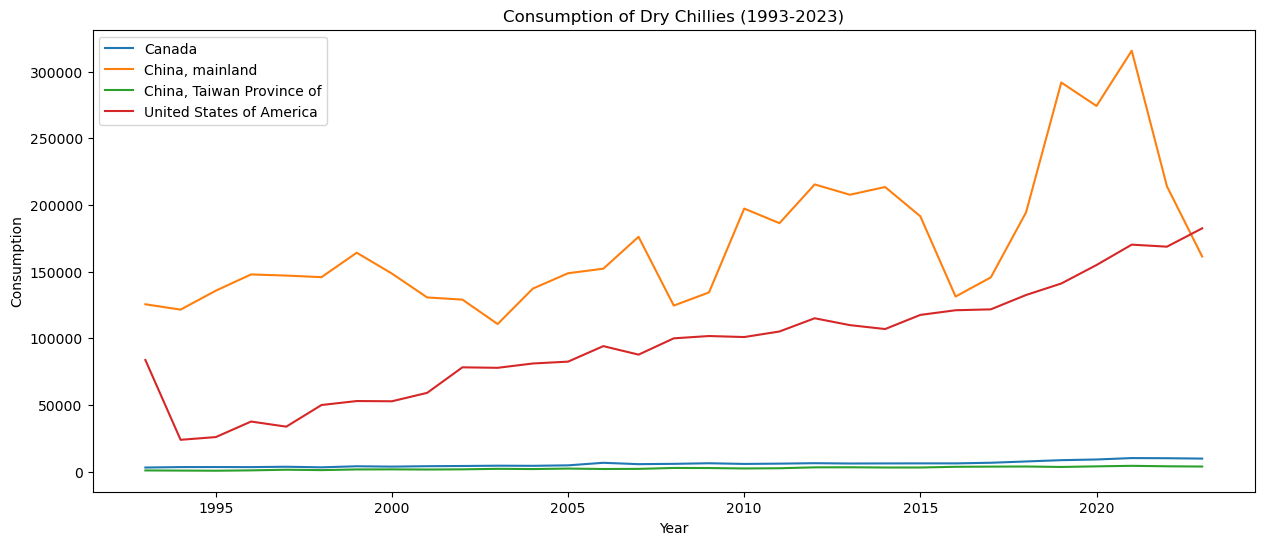

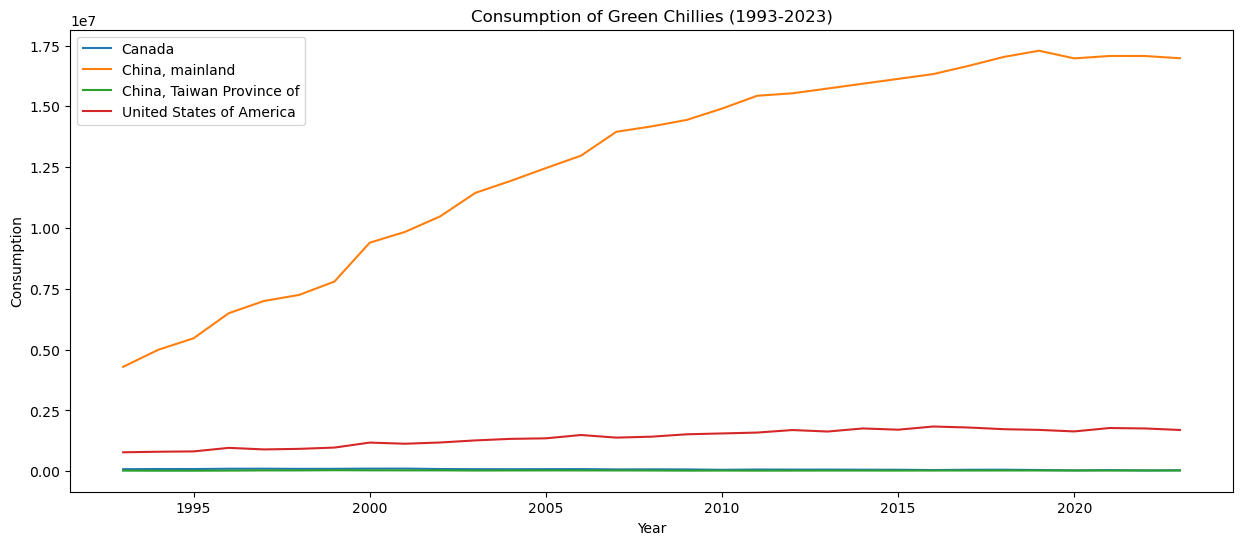

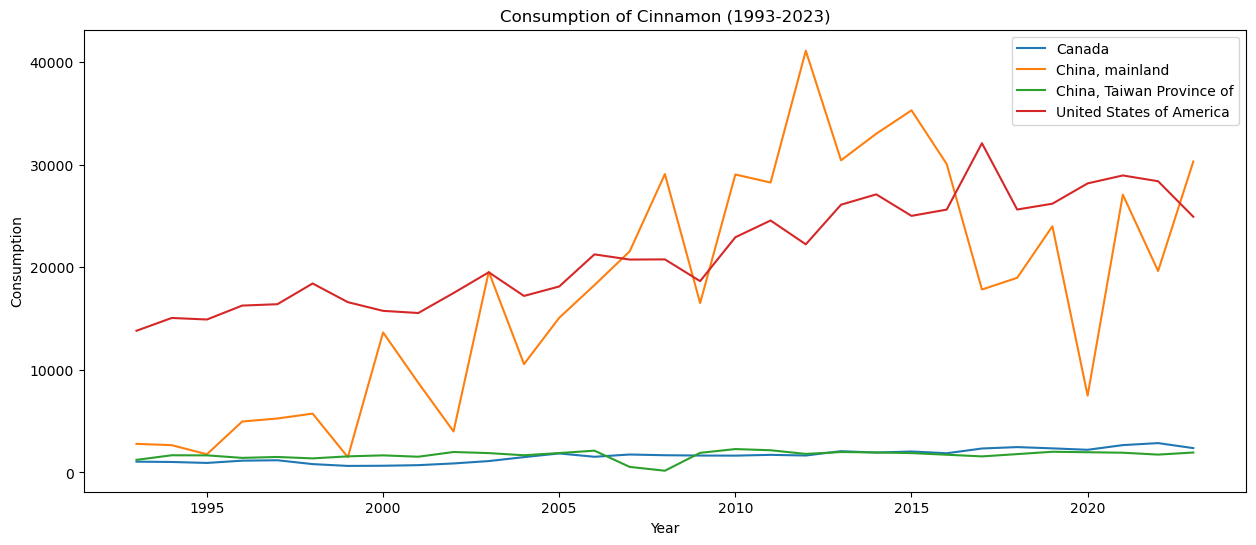

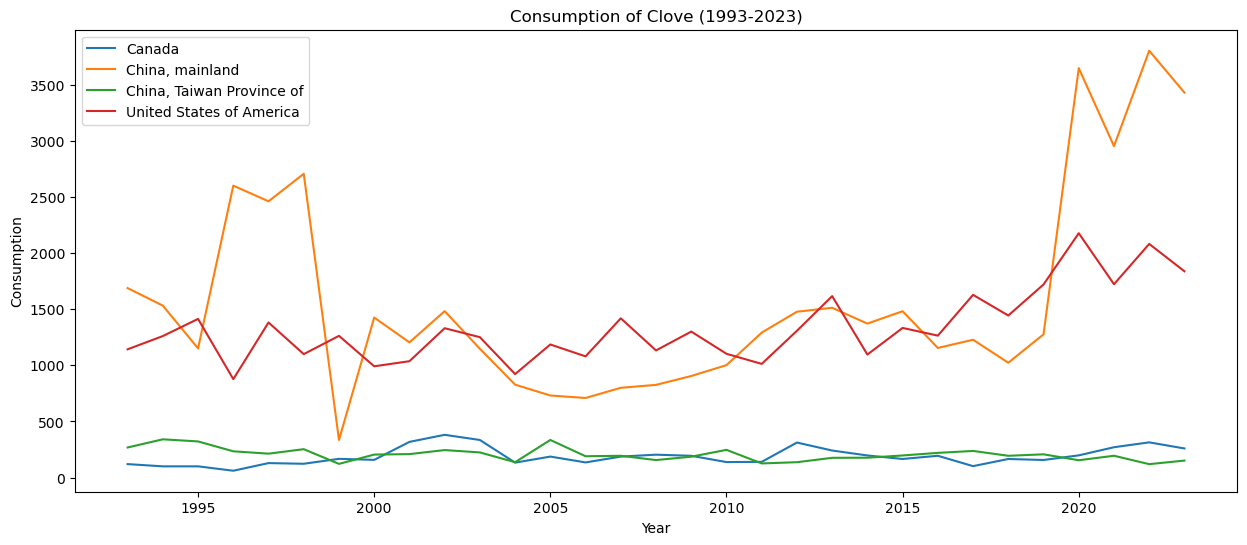

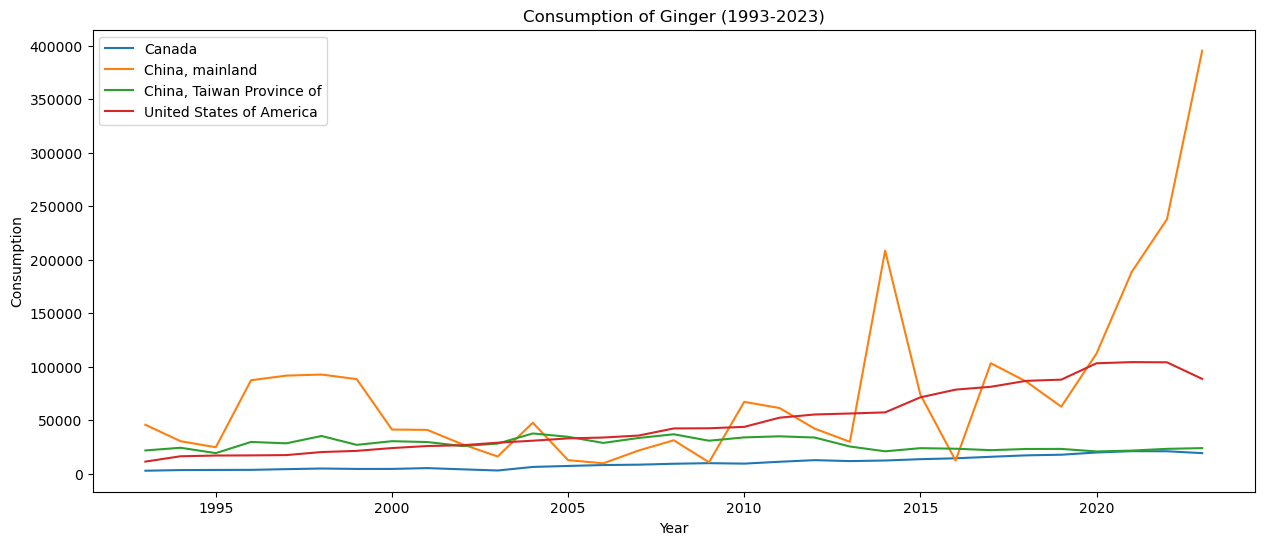

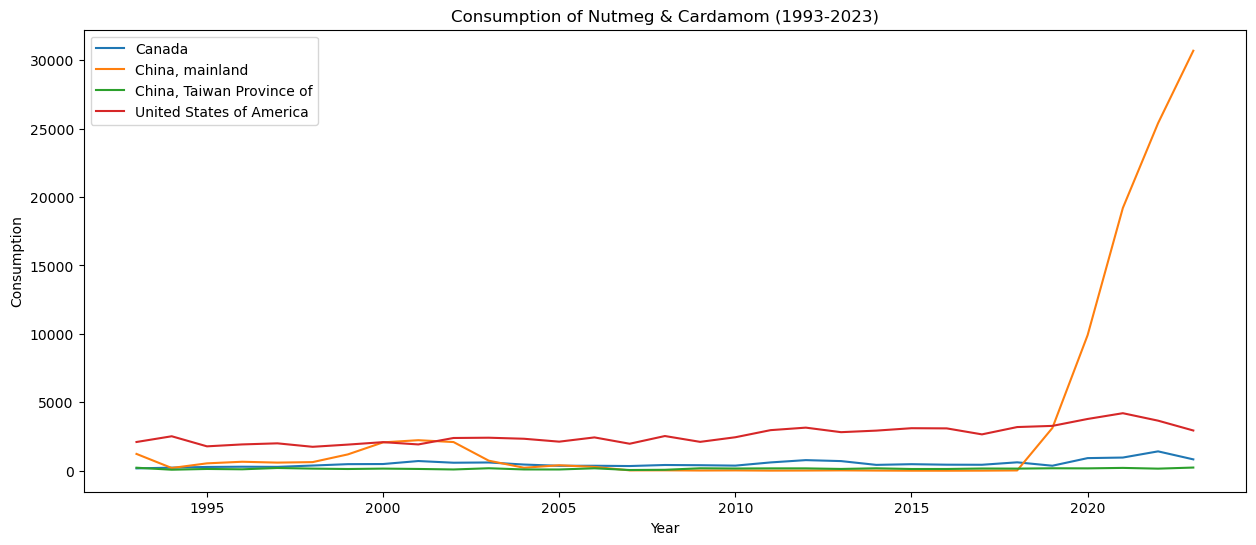

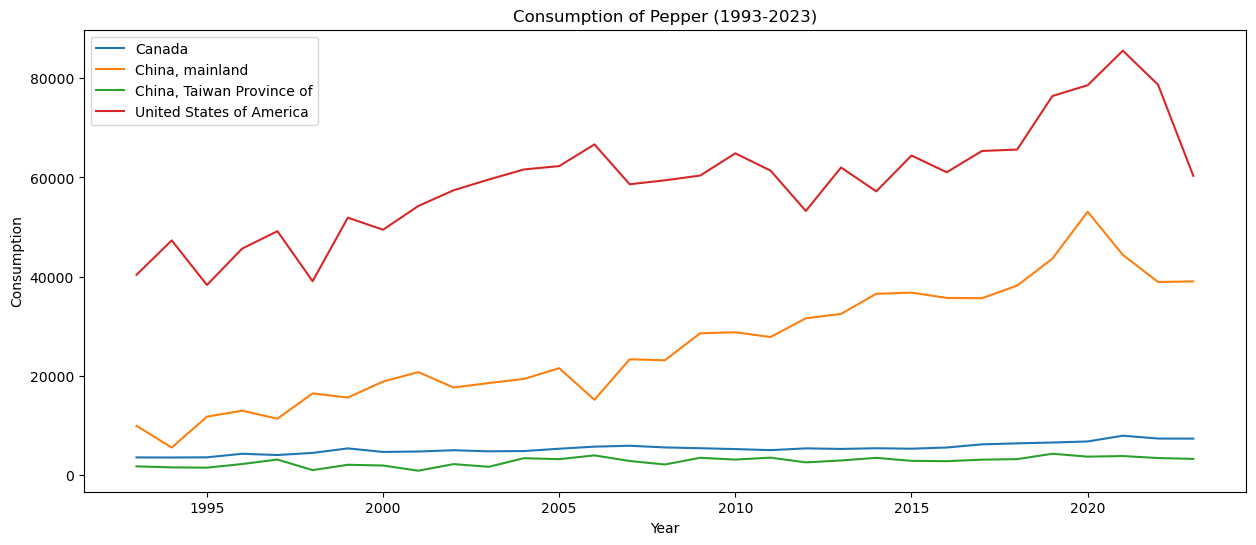

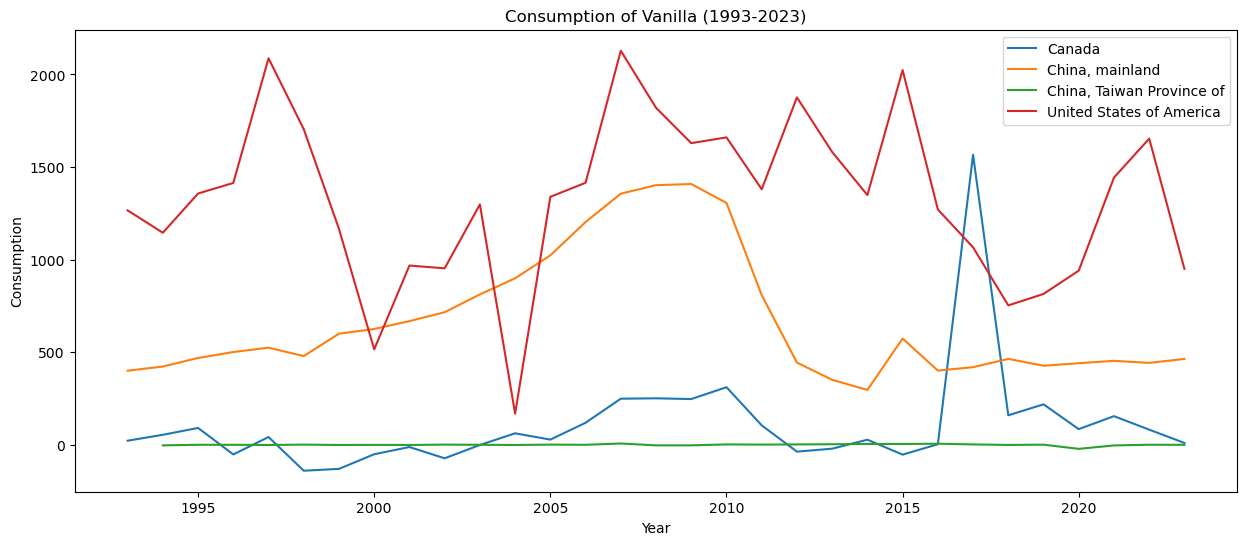

In [417]:
for spiceName in subset['Item'].unique():
    plt.figure(figsize=(15,6))
    for country in subsetList:
        spiceCountry = subset[subset['Area'] == country]
        granularSpice = spiceCountry[spiceCountry['Item'] == spiceName]
        sns.lineplot(granularSpice, x='Year', y='Consumption', label=country)
    plt.title('Consumption of %s (1993-2023)' % spiceName)
    plt.show()

## Thoughts: The "Consumption" in the dataset is a very rough estimate, calculated by the formula: import + production - export = consumption.
### Looking at the data, I think a large part of what's lost is any processing of spice that is outside pure spice trade. For example the act of drying green chili into dry chili wouldn't decrease the consumption of green chili. The green chili is, perhaps, consumed in the manufacturing of dry chili, but isn't necessarily representative of consumer trends. Similarly if, for another example, vanilla or cinammon was used in the production of cookies or packaged goods, meant for export.

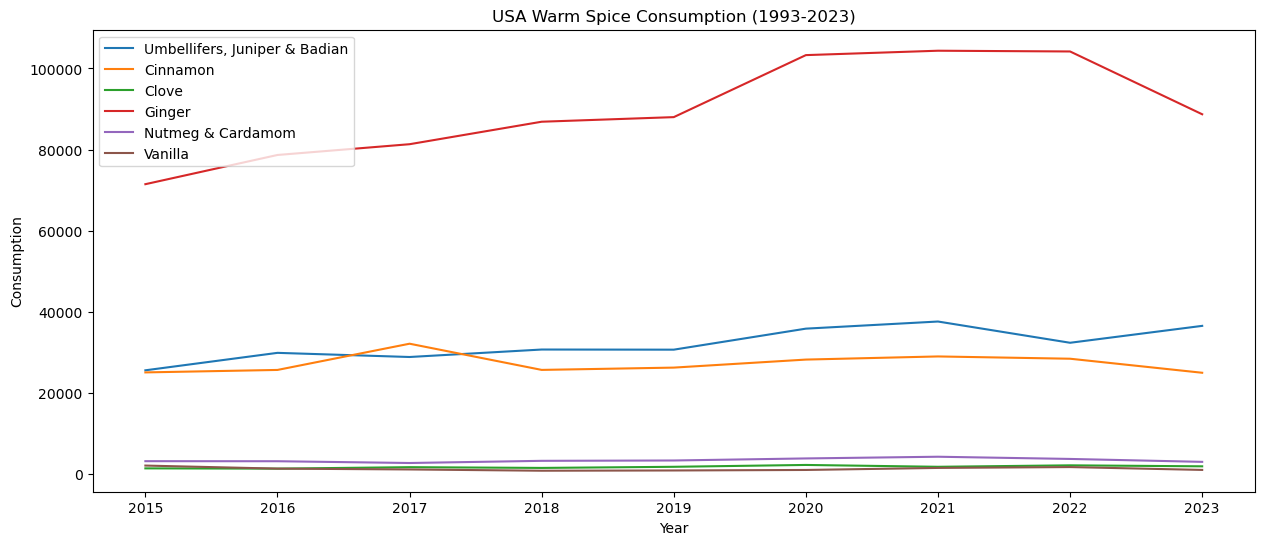

In [419]:
#Limiting year to look at consumption trends for the past decade
USA = subset[(subset['Area'] == 'United States of America') & (subset['Year'] >= 2015)]
warmSpices = np.delete(subset['Item'].unique(), [1,2,7])

plt.figure(figsize=(15,6))
for spiceName in warmSpices:
    granularSpice = USA[USA['Item'] == spiceName]
    sns.lineplot(granularSpice, x='Year', y='Consumption', label=spiceName)
plt.title('USA Warm Spice Consumption (1993-2023)')
plt.legend(loc=2)
plt.show()

In [454]:
USA[USA['Year'] == 2023] 

,Area,Item Code,Item,Year,Import,Export,Production,Consumption
43284,United States of America,1654,"Umbellifers, Juniper & Badian",2023,39228.420,2738.130,0.000,36490.290
43315,United States of America,1652,Dry Chillies,2023,191292.490,8800.620,0.000,182491.870
43346,United States of America,1231,Green Chillies,2023,1251711.170,131357.210,576743.000,1697096.960
43377,United States of America,1655,Cinnamon,2023,27854.730,2933.610,0.000,24921.120
43408,United States of America,1656,Clove,2023,2032.930,194.710,0.000,1838.220
43439,United States of America,1657,Ginger,2023,94511.460,6478.620,661.790,88694.630
43470,United States of America,1653,Nutmeg & Cardamom,2023,3345.260,404.260,0.000,2941.000
43501,United States of America,1651,Pepper,2023,69051.550,8726.040,0.000,60325.510
43532,United States of America,1658,Vanilla,2023,1283.430,333.710,0.000,949.720


### I was personally interested to see if any warm spices had increased consumption within the USA, as a way to extrapolate any trending flavor(s). The blue line is the most consistent increase, however, is the least useful for drawing conclusions since it is a very wide category of spices. On the other hand, Ginger (red) has seen growth over the past decade, but is also declining based on the last available data points.

### Note that the USA may have slightly more accurate consumption under this model, as it is not a major producer of many tropical / subtropical products. At the same time, I question the accuracy of the FAOSTAT data, I'm positive the country produces some amount of dry chili (Any country with green chili production should as consequence have dry chili production...by drying chili). Additionally things like Haiwaiian vanilla, etc. 